In [16]:
# IMPORTING LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [17]:
# IMPORTING DATASET
dataset = pd.read_csv(r'C:\Users\anand\OneDrive - Sheridan College\College\Machine Learning\Projects\Walmart Sales Prediction\Walmart_sales.csv')

# Basic EDA
print(dataset.head())
print("---------------------------------------------------------------------------")
print(dataset.info())
print("---------------------------------------------------------------------------")
print("Columns in the dataset:", dataset.columns)

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2 

In [18]:
# Check for missing values
print("Missing values:")
print(dataset.isnull().sum())

Missing values:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [19]:
# Extracting Date Related features in seperate columns

dataset['Date'] = pd.to_datetime(dataset['Date'], format = '%d-%m-%Y', dayfirst=True)
dataset['Year'] = dataset['Date'].dt.year
dataset['Month'] = dataset['Date'].dt.month
dataset['Week'] = dataset['Date'].dt.isocalendar().week

dataset.drop('Date', axis=1, inplace=True)

# Encoding the Categorically columns (It will create different columns for different categories)
dataset = pd.get_dummies(dataset, columns=['Store', 'Holiday_Flag'])

print(dataset.head())

   Weekly_Sales  Temperature  Fuel_Price         CPI  Unemployment  Year  \
0    1643690.90        42.31       2.572  211.096358         8.106  2010   
1    1641957.44        38.51       2.548  211.242170         8.106  2010   
2    1611968.17        39.93       2.514  211.289143         8.106  2010   
3    1409727.59        46.63       2.561  211.319643         8.106  2010   
4    1554806.68        46.50       2.625  211.350143         8.106  2010   

   Month  Week  Store_1  Store_2  ...  Store_38  Store_39  Store_40  Store_41  \
0      2     5     True    False  ...     False     False     False     False   
1      2     6     True    False  ...     False     False     False     False   
2      2     7     True    False  ...     False     False     False     False   
3      2     8     True    False  ...     False     False     False     False   
4      3     9     True    False  ...     False     False     False     False   

   Store_42  Store_43  Store_44  Store_45  Holiday_Flag_

In [20]:
x = dataset.drop('Weekly_Sales', axis=1)
y = dataset['Weekly_Sales']

# Splitting the data into Training and Testing Set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

Linear Regression R-squared: 0.92282388432907


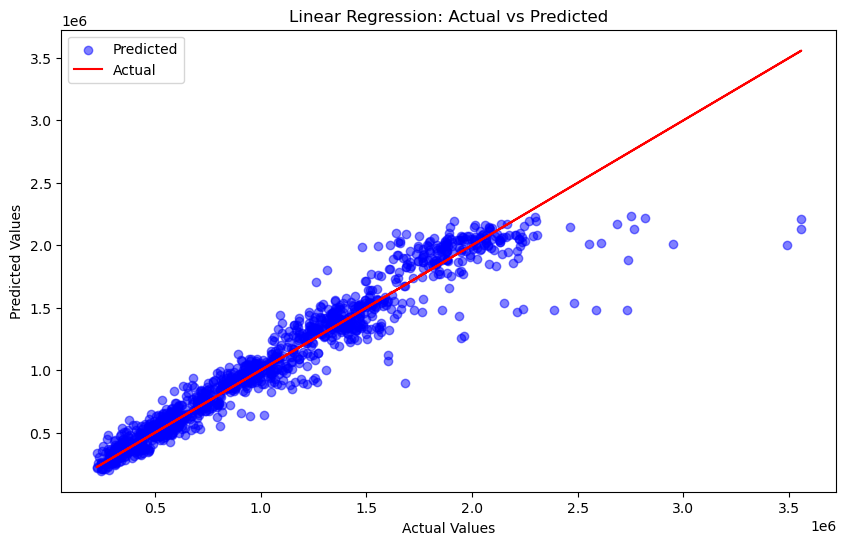

In [21]:
# Linear Regression 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred_l = regressor.predict(x_test)
print(f'Linear Regression R-squared: {r2_score(y_test, y_pred_l)}')

# Linear Regression Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_l, alpha=0.5, color='blue', label='Predicted')
plt.plot(y_test, y_test, color='red', label='Actual')  # Diagonal line showing perfect predictions
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

Polynomial Regression R-squared: 0.9504459104525015


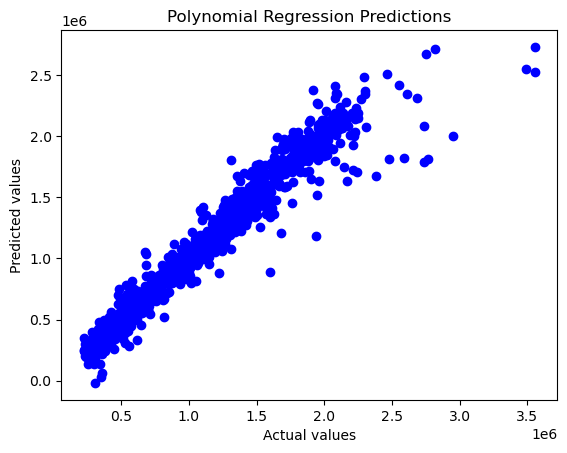

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Polynomial Features Transformation
poly_features = PolynomialFeatures(degree=2) 
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)

# Polynomial Regression
poly_regressor = LinearRegression()
poly_regressor.fit(x_train_poly, y_train)
y_pred_poly = poly_regressor.predict(x_test_poly)

# Evaluate the Polynomial Regression
poly_r_squared = r2_score(y_test, y_pred_poly)
print(f'Polynomial Regression R-squared: {poly_r_squared}')

# Visualization for Polynomial Regression 
plt.scatter(y_test, y_pred_poly, color='blue')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Polynomial Regression Predictions')
plt.show()


Random Forest Regression R-squared: 0.9570245799907272


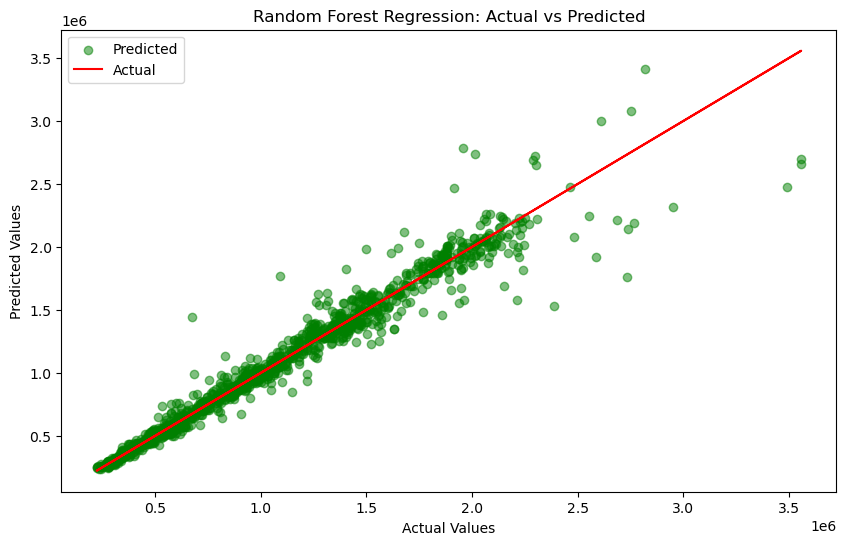

In [23]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train,y_train)
y_pred_rf = regressor.predict(x_test)
print(f'Random Forest Regression R-squared: {r2_score(y_test, y_pred_rf)}')

import matplotlib.pyplot as plt

# Random Forest Regression Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='green', label='Predicted')
plt.plot(y_test, y_test, color='red', label='Actual')  # Diagonal line showing perfect predictions
plt.title('Random Forest Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


Decision Tree Regression R-squared: 0.9381879495481239


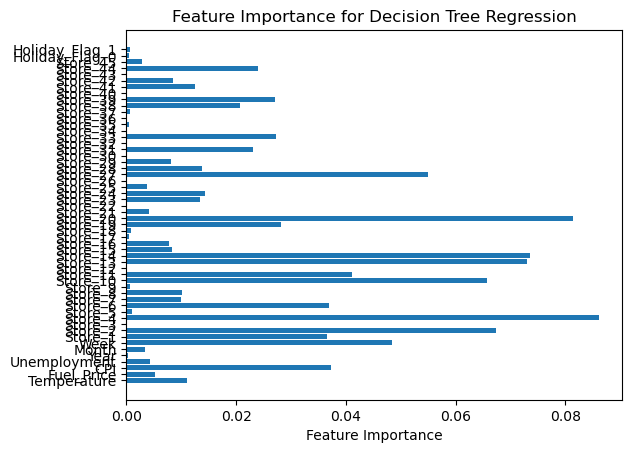

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Decision Tree Regression
dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(x_train, y_train)
y_pred_dt = dt_regressor.predict(x_test)

# Evaluate the Decision Tree Regression
dt_r_squared = r2_score(y_test, y_pred_dt)
print(f'Decision Tree Regression R-squared: {dt_r_squared}')

# Visualization 
feature_importances = dt_regressor.feature_importances_
plt.barh(x.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Decision Tree Regression')
plt.show()


In [25]:
"""
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_tr = sc.fit_transform(x_train)
x_te = sc.transform(x_test)

# Support Vector Machine
from sklearn.svm import SVR

svm_regressor = SVR(kernel = 'rbf')
svm_regressor.fit(x_tr, y_train)
y_pred_svm = svm_regressor.predict(x_te)
print(f'SVM Regression R-squared: {r2_score(y_test, y_pred_svm)}')
"""

"\n# Feature scaling\nfrom sklearn.preprocessing import StandardScaler\nsc = StandardScaler()\nx_tr = sc.fit_transform(x_train)\nx_te = sc.transform(x_test)\n\n# Support Vector Machine\nfrom sklearn.svm import SVR\n\nsvm_regressor = SVR(kernel = 'rbf')\nsvm_regressor.fit(x_tr, y_train)\ny_pred_svm = svm_regressor.predict(x_te)\nprint(f'SVM Regression R-squared: {r2_score(y_test, y_pred_svm)}')\n"